## Importing Libraries

In [234]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Test set Image Processing

In [237]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Downloads/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

## Loading Model

In [240]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

## Visualising and Performing Prediction on Single image

In [243]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


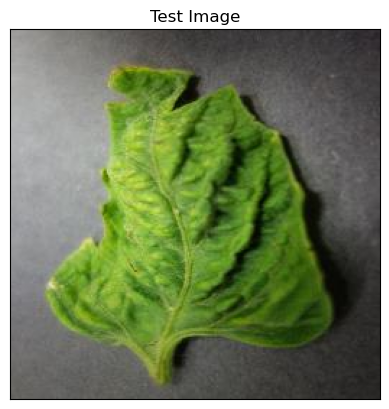

In [244]:
#Test Image Visualization
import cv2
image_path = 'Downloads/archive/test/test/TomatoYellowCurlVirus4.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


## Testing Model

In [248]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


In [250]:
print(predictions)

[[1.6220941e-11 1.9804878e-11 3.4345404e-09 4.2988804e-10 1.8709136e-09
  7.6889020e-09 4.5059828e-12 2.8755257e-11 2.5011072e-12 2.9178058e-12
  4.4509587e-11 2.2129905e-08 7.8495299e-09 1.5126779e-09 1.2817848e-12
  1.0414559e-08 3.5371006e-10 1.6774351e-12 2.9552652e-08 6.2874430e-09
  2.2855821e-12 2.1797346e-10 8.0985724e-10 4.1463011e-07 1.9731586e-10
  8.5760350e-09 2.6894062e-10 1.1443364e-09 3.0233761e-07 1.7060851e-08
  1.4420955e-08 8.4954427e-10 9.0743318e-10 7.0385582e-08 5.0992401e-09
  9.9999905e-01 1.6716829e-08 5.4478688e-10]]


In [252]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

35


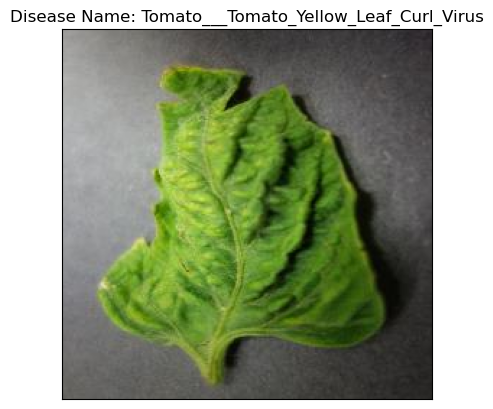

In [254]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()
